In [117]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
from nltk import pos_tag
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [118]:
data_message = pd.read_csv("SMSSpamCollection",sep="\t", names=["label","message"])

In [119]:
data_message.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [120]:
def preprocessing(text):
    text2 = " ".join("".join([" " if ch in string.punctuation else ch for ch in text]).split())

    tokens = [word for sent in nltk.sent_tokenize(text2) for word in
              nltk.word_tokenize(sent)]
    
    tokens = [word.lower() for word in tokens]
    
    stopwds = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopwds]
    
    tokens = [word for word in tokens if len(word)>=3]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    tagged_corpus = pos_tag(tokens)    
    
    Noun_tags = ['NN','NNP','NNPS','NNS']
    Verb_tags = ['VB','VBD','VBG','VBN','VBP','VBZ']

    lemmatizer = WordNetLemmatizer()
    
    def prat_lemmatize(token,tag):
        if tag in Noun_tags:
            return lemmatizer.lemmatize(token,'n')
        elif tag in Verb_tags:
            return lemmatizer.lemmatize(token,'v')
        else:
            return lemmatizer.lemmatize(token,'n')
    
    pre_proc_text =  " ".join([prat_lemmatize(token,tag) for token,tag in tagged_corpus])             

    return pre_proc_text

In [121]:
data_message.head(20)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [122]:
# Count the number of words in each Text
data_message['Count']=0
for i in np.arange(0,len(data_message.message)):
    data_message.loc[i,'Count'] = len(data_message.loc[i,'message'])

In [123]:
data_message.head()

,label,message,Count
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [124]:
# collecting ham messages in one place 
ham  = data_message[data_message.label == "ham"]
ham_count  = pd.DataFrame(pd.value_counts(ham['Count'],sort=True).sort_index())
print("Number of ham messages in data set:", ham['label'].count())
print("Ham Count value", ham_count['Count'].count())

Number of ham messages in data set: 4825
Ham Count value 271


In [125]:
# collecting spam messages in one place 
spam = data_message[data_message.label == "spam"]
spam_count = pd.DataFrame(pd.value_counts(spam['Count'],sort=True).sort_index())
print("Number of spam messages in data set:", spam['label'].count())
print("Spam Count value:", spam_count['Count'].count())

Number of spam messages in data set: 747
Spam Count value: 115


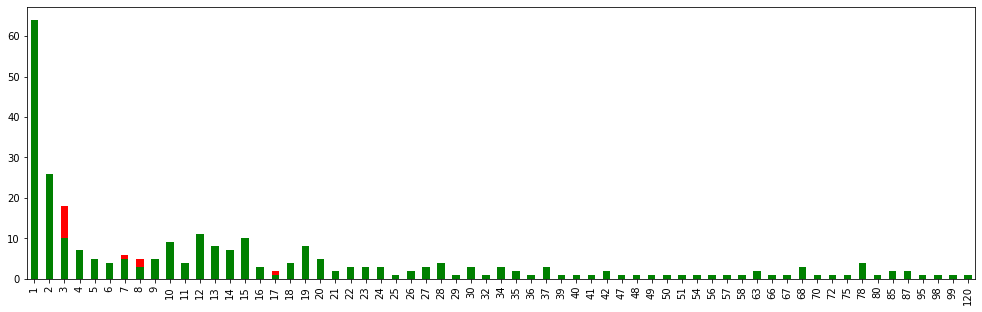

In [126]:
fig, ax = plt.subplots(figsize=(17,5))
spam_count['Count'].value_counts().sort_index().plot(ax=ax, kind='bar',facecolor='red');
ham_count['Count'].value_counts().sort_index().plot(ax=ax, kind='bar',facecolor='green');

In [127]:
data_message["message"] = data_message["message"].str.replace("I","i")

In [128]:
def count_capital(x):
    return pd.DataFrame(x.values.tolist()).stack().str.split(expand=True).stack().str.isupper().sum()

In [129]:
data_message["message_word_capital_count"] = data_message["message"].apply(lambda x :count_capital(pd.Series(x)))

In [130]:
data_message.head(20)

,label,message,Count,message_word_capital_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,ham,U dun say so early hor... U c already then say...,49,2
4,ham,"Nah i don't think he goes to usf, he lives aro...",61,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,0
6,ham,Even my brother is not like to speak with me. ...,77,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,0
8,spam,WiNNER!! As a valued network customer you have...,157,1
9,spam,Had your mobile 11 months or more? U R entitle...,154,3


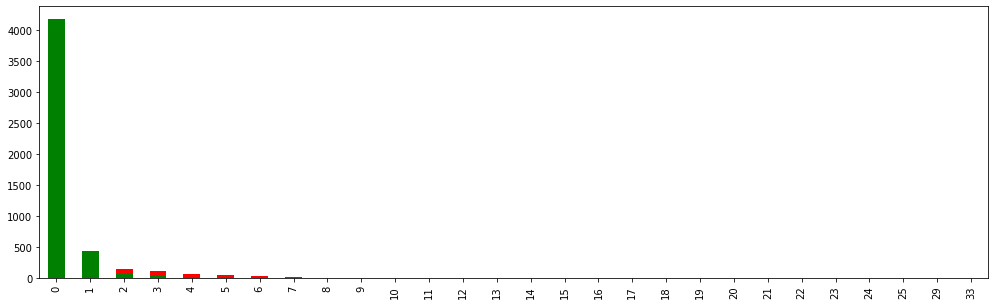

In [131]:
fig, ax = plt.subplots(figsize=(17,5))
data_message[data_message['label']=="spam"]['message_word_capital_count'].value_counts().sort_index().plot(ax=ax, kind='bar',facecolor='red');
data_message[data_message['label']=="ham"]['message_word_capital_count'].value_counts().sort_index().plot(ax=ax, kind='bar',facecolor='green');

In [132]:
data_message["label_num"] = np.where(data_message["label"]=="spam",1,0)

In [133]:
def digit_number_conversion(x):
    return ''.join(" number " if c.isdigit() else c for c in x)

In [134]:
data_message["message_digit_conversion"] = data_message["message"].apply(lambda x :digit_number_conversion(x))

In [135]:
def digit_number_count(x):
    return x.count("number")

In [136]:
data_message["digit_count"] = data_message["message_digit_conversion"].apply(lambda x :digit_number_count(x))

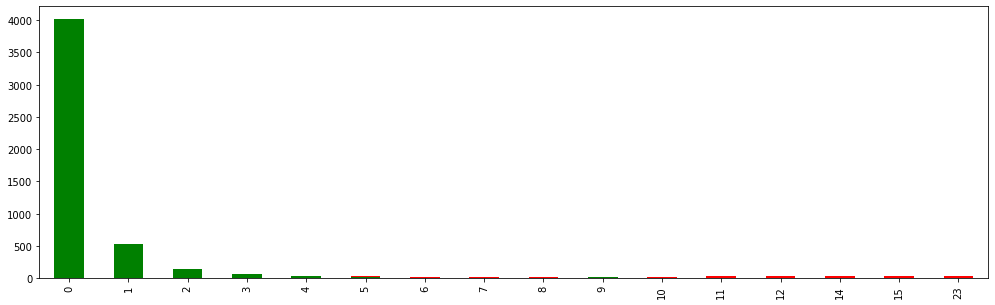

In [137]:
fig, ax = plt.subplots(figsize=(17,5))
data_message[data_message['label']=="spam"]['digit_count'].value_counts().sort_index().plot(ax=ax, kind='bar',facecolor='red');
data_message[data_message['label']=="ham"]['digit_count'].value_counts().sort_index().plot(ax=ax, kind='bar',facecolor='green');

In [138]:
data_message.columns

Index(['label', 'message', 'Count', 'message_word_capital_count', 'label_num',
       'message_digit_conversion', 'digit_count'],
      dtype='object')

In [139]:
data_message["message_didit_currency_conversion"] = data_message['message_digit_conversion'].str.replace('$' ,' currency ')
data_message["message_didit_currency_conversion"] = data_message['message_didit_currency_conversion'].str.replace('£' ,' currency ')
data_message["message_didit_currency_conversion"] = data_message['message_didit_currency_conversion'].str.replace('€' ,' currency ')
data_message["message_didit_currency_conversion"] = data_message['message_didit_currency_conversion'].str.replace('₹' ,' currency ')
data_message["message_didit_currency_conversion"] = data_message['message_didit_currency_conversion'].str.replace('¥' ,' currency ')

#,',':' ','&':' ','(':' ',')':' ','*':' ','[':' ',']':' '})
                                                               

In [140]:
def currency_count(x):
    return x.count("currency")

In [141]:
data_message["currency_count"] = data_message["message_didit_currency_conversion"].apply(lambda x :digit_number_count(x))

In [142]:
data_message[data_message["currency_count"]>6]["label"].value_counts()

spam    610
ham      33
Name: label, dtype: int64

In [143]:
data_message["message_clean"] = data_message["message_didit_currency_conversion"].apply(lambda x :preprocessing(x))

In [144]:
data_message.head()

,label,message,Count,message_word_capital_count,label_num,message_digit_conversion,digit_count,message_didit_currency_conversion,currency_count,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,0,"Go until jurong point, crazy.. Available only ...",0,"Go until jurong point, crazy.. Available only ...",0,jurong point crazi avail bugi great world buff...
1,ham,Ok lar... Joking wif u oni...,29,0,0,Ok lar... Joking wif u oni...,0,Ok lar... Joking wif u oni...,0,lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,1,Free entry in number a wkly comp to win FA C...,25,Free entry in number a wkly comp to win FA C...,25,free entri number wkli comp win cup final tkt ...
3,ham,U dun say so early hor... U c already then say...,49,2,0,U dun say so early hor... U c already then say...,0,U dun say so early hor... U c already then say...,0,dun say earli hor alreadi say
4,ham,"Nah i don't think he goes to usf, he lives aro...",61,0,0,"Nah i don't think he goes to usf, he lives aro...",0,"Nah i don't think he goes to usf, he lives aro...",0,nah think goe usf live around though


In [145]:
X = data_message[["message_clean","Count","message_word_capital_count","digit_count","currency_count"]]

In [146]:
y = data_message["label_num"]

In [147]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3)

In [148]:
#n_train = np.array(train_X[["Count","message_word_capital_count","digit_count","currency_count"]])
#n_test = np.array(test_X[["Count","message_word_capital_count","digit_count","currency_count"]])


In [149]:
#x_train_2 = np.concatenate((x_train_2,n_train), axis=1)

In [150]:
#x_test_2 = np.concatenate((x_test_2,n_test), axis=1)

# Text Wrangling & Normalization

In [151]:
import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata


def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  
    norm_docs.append(doc)
  
  return norm_docs

In [152]:
%%time

norm_train_message = pre_process_corpus(train_X["message_clean"])
norm_test_message = pre_process_corpus(test_X["message_clean"])

100%|██████████| 1672/1672 [00:00<00:00, 6582.34it/s]

CPU times: user 700 ms, sys: 95.3 ms, total: 796 ms
Wall time: 840 ms


In [153]:
result_data = dict()

def wrong_prediction(conf):
    return conf[0][1] + conf[1][0]


#  Traditional Supervised Machine Learning Models

## Feature Engineering


In [154]:
%%time

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=5, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_message)


# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=5, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_message)

CPU times: user 273 ms, sys: 43.8 ms, total: 317 ms
Wall time: 365 ms


In [155]:
%%time

# transform test reviews into features
cv_test_features = cv.transform(norm_test_message)
tv_test_features = tv.transform(norm_test_message)

CPU times: user 69.3 ms, sys: 2.92 ms, total: 72.2 ms
Wall time: 71.9 ms


In [156]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (3900, 1570)  Test features shape: (1672, 1570)
TFIDF model:> Train features shape: (3900, 1570)  Test features shape: (1672, 1570)


## Model Training, Prediction and Performance Evaluation

### Logistic Regression
The logistic regression model is actually a statistical model developed by statistician David Cox in 1958. It is also known as the logit or logistic model since it uses the logistic (popularly also known as sigmoid) mathematical function to estimate the parameter values. These are the coefficients of all our features such that the overall loss is minimized when predicting the outcome—

In [157]:
%%time

# Logistic Regression model on BOW features
from sklearn.linear_model import LogisticRegression

# instantiate model
lr = LogisticRegression(penalty='l2', max_iter=500, C=1, solver='lbfgs', random_state=42)

# train model
lr.fit(cv_train_features, train_y)

# predict on test data
lr_bow_predictions = lr.predict(cv_test_features)

CPU times: user 58.4 ms, sys: 35.6 ms, total: 94.1 ms
Wall time: 141 ms


In [158]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['spam', 'ham']
print(classification_report(test_y, lr_bow_predictions))
pd.DataFrame(confusion_matrix(test_y, lr_bow_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1454
           1       0.98      0.90      0.94       218

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.99      1672



,spam,ham
spam,1451,3
ham,21,197


In [159]:
result_data.update({'Logistic_BOW': wrong_prediction(confusion_matrix(test_y, lr_bow_predictions))})

In [181]:
%%time

# Logistic Regression model on TFIDF features
from sklearn.linear_model import LogisticRegression

# instantiate model
lr = LogisticRegression(penalty='l2', max_iter=1000, C=100, solver='newton-cg', random_state=42)

# train model
lr.fit(tv_train_features, train_y)

# predict on test data
lr_tfidf_predictions = lr.predict(tv_test_features)

CPU times: user 65.2 ms, sys: 2.73 ms, total: 67.9 ms
Wall time: 66.7 ms


In [182]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['spam', 'ham']
print(classification_report(test_y, lr_tfidf_predictions))
pd.DataFrame(confusion_matrix(test_y, lr_tfidf_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1454
           1       0.97      0.93      0.95       218

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



,spam,ham
spam,1447,7
ham,16,202


In [183]:
#Appending the result
result_data.update({'Logistic_TFIDF': wrong_prediction(confusion_matrix(test_y, lr_tfidf_predictions))})

### Multinomial Naive Bayes

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [184]:
%%time

# MultinomialNB model on BOW features
from sklearn.naive_bayes import MultinomialNB

# instantiate model
NB = MultinomialNB()

# train model
NB.fit(cv_train_features, train_y)

# predict on test data
NB_BOW_predictions = NB.predict(cv_test_features)

CPU times: user 4.4 ms, sys: 29.1 ms, total: 33.5 ms
Wall time: 67.4 ms


In [185]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['spam', 'ham']
print(classification_report(test_y, NB_BOW_predictions))
pd.DataFrame(confusion_matrix(test_y, NB_BOW_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1454
           1       0.91      0.94      0.92       218

    accuracy                           0.98      1672
   macro avg       0.95      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



,spam,ham
spam,1433,21
ham,13,205


In [186]:
result_data.update({'NaiveBayes_BOW': wrong_prediction(confusion_matrix(test_y, NB_BOW_predictions))})

In [187]:
%%time

# MultinomialNB model on TFIDF features
from sklearn.naive_bayes import MultinomialNB

# instantiate model
NB = MultinomialNB()

# train model
NB.fit(tv_train_features, train_y)

# predict on test data
NB_tfidf_predictions = NB.predict(tv_test_features)

CPU times: user 3.05 ms, sys: 1.46 ms, total: 4.51 ms
Wall time: 3.11 ms


In [188]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['spam', 'ham']
print(classification_report(test_y, NB_tfidf_predictions))
pd.DataFrame(confusion_matrix(test_y, NB_tfidf_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1454
           1       0.98      0.91      0.94       218

    accuracy                           0.99      1672
   macro avg       0.98      0.95      0.97      1672
weighted avg       0.98      0.99      0.98      1672



,spam,ham
spam,1449,5
ham,20,198


In [189]:
result_data.update({'NaiveBayes_TFIDF': wrong_prediction(confusion_matrix(test_y, NB_tfidf_predictions))})

### Decision Tree
A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [190]:
%%time

# Decision Tree model on BOW features
from sklearn.tree import DecisionTreeClassifier

# instantiate model
dtree = DecisionTreeClassifier(random_state=42)

# train model
dtree.fit(cv_train_features, train_y)

# predict on test data
dtree_bow_predictions = dtree.predict(cv_test_features)

CPU times: user 53.5 ms, sys: 109 ms, total: 162 ms
Wall time: 287 ms


In [191]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['spam', 'ham']
print(classification_report(test_y, dtree_bow_predictions))
pd.DataFrame(confusion_matrix(test_y, dtree_bow_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1454
           1       0.94      0.89      0.91       218

    accuracy                           0.98      1672
   macro avg       0.96      0.94      0.95      1672
weighted avg       0.98      0.98      0.98      1672



,spam,ham
spam,1442,12
ham,25,193


In [192]:
result_data.update({'DecisionTree_BOW': wrong_prediction(confusion_matrix(test_y, dtree_bow_predictions))})

In [193]:
%%time

# Decision Tree model on TFIDF features
from sklearn.tree import DecisionTreeClassifier

# instantiate model
dtree = DecisionTreeClassifier(random_state=42)

# train model
dtree.fit(tv_train_features, train_y)

# predict on test data
dtree_tfidf_predictions = dtree.predict(tv_test_features)

CPU times: user 92.1 ms, sys: 1.96 ms, total: 94.1 ms
Wall time: 93.8 ms


In [194]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['spam', 'ham']
print(classification_report(test_y, dtree_tfidf_predictions))
pd.DataFrame(confusion_matrix(test_y, dtree_tfidf_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1454
           1       0.88      0.88      0.88       218

    accuracy                           0.97      1672
   macro avg       0.93      0.93      0.93      1672
weighted avg       0.97      0.97      0.97      1672



,spam,ham
spam,1427,27
ham,27,191


In [195]:
result_data.update({'DecisionTree_TFIDF': wrong_prediction(confusion_matrix(test_y, dtree_tfidf_predictions))})

### K-Nearest Neighbour
sklearn.neighbors provides functionality for unsupervised and supervised neighbors-based learning methods. Unsupervised nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering. Supervised neighbors-based learning comes in two flavors: classification for data with discrete labels, and regression for data with continuous labels.

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree).

Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits and satellite image scenes. Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

The classes in sklearn.neighbors can handle either NumPy arrays or scipy.sparse matrices as input. For dense matrices, a large number of possible distance metrics are supported. For sparse matrices, arbitrary Minkowski metrics are supported for searches.

There are many learning routines which rely on nearest neighbors at their core. One example is kernel density estimation, discussed in the density estimation section.

In [196]:
%%time

# KNeighborsClassifier model on BOW features
from sklearn.neighbors import KNeighborsClassifier

# instantiate model
knn = KNeighborsClassifier(n_neighbors=9)

# train model
knn.fit(cv_train_features, train_y)

# predict on test data
knn_bow_predictions = knn.predict(cv_test_features)

CPU times: user 214 ms, sys: 58.9 ms, total: 273 ms
Wall time: 294 ms


In [197]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['spam', 'ham']
print(classification_report(test_y, knn_bow_predictions))
pd.DataFrame(confusion_matrix(test_y, knn_bow_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1454
           1       0.98      0.80      0.88       218

    accuracy                           0.97      1672
   macro avg       0.97      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672



,spam,ham
spam,1450,4
ham,44,174


In [198]:
result_data.update({'KNN_BOW': wrong_prediction(confusion_matrix(test_y, knn_bow_predictions))})

In [199]:
%%time

# LKNeighborsClassifier model on TFIDF features
from sklearn.neighbors import KNeighborsClassifier

# instantiate model
knn = KNeighborsClassifier(n_neighbors=5)

# train model
knn.fit(tv_train_features, train_y)

# predict on test data
knn_tfidf_predictions = knn.predict(tv_test_features)

CPU times: user 171 ms, sys: 10.3 ms, total: 181 ms
Wall time: 181 ms


In [200]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['spam', 'ham']
print(classification_report(test_y, knn_tfidf_predictions))
pd.DataFrame(confusion_matrix(test_y, knn_tfidf_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1454
           1       1.00      0.65      0.79       218

    accuracy                           0.95      1672
   macro avg       0.98      0.83      0.88      1672
weighted avg       0.96      0.95      0.95      1672



,spam,ham
spam,1454,0
ham,76,142


In [201]:
result_data.update({'KNN_TFIDF': wrong_prediction(confusion_matrix(test_y, knn_tfidf_predictions))})

### Random Forest
Decision trees are a family of supervised machine learning algorithms that can represent and interpret sets of rules automatically from the underlying data. They use metrics like information gain and gini-index to build the tree. However, a major drawback of decision trees is that since they are non-parametric, the more data there is, greater the depth of the tree. We can end up with really huge and deep trees that are prone to overfitting. The model might work really well on training data, but instead of learning, it just memorizes all the training samples and builds very specific rules to them. Hence, it performs really poorly on the test data. Random forests try to tackle this problem.

A random forest is a meta-estimator or an ensemble model that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size, but the samples are drawn with replacement (bootstrap samples). In random forests, all the trees are trained in parallel (bagging model/bootstrap aggregation). Besides this, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. Also, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. T

In [202]:
%%time

# Random Forest model on BOW features
from sklearn.ensemble import RandomForestClassifier

# instantiate model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# train model
rf.fit(cv_train_features, train_y)

# predict on test data
rf_bow_predictions = rf.predict(cv_test_features)

CPU times: user 618 ms, sys: 152 ms, total: 770 ms
Wall time: 535 ms


In [203]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['spam', 'ham']
print(classification_report(test_y, rf_bow_predictions))
pd.DataFrame(confusion_matrix(test_y, rf_bow_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1454
           1       0.97      0.89      0.93       218

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



,spam,ham
spam,1448,6
ham,24,194


In [204]:
result_data.update({'Random Forest_BOW': wrong_prediction(confusion_matrix(test_y, rf_bow_predictions))})

In [205]:
%%time

# Random Forest model on TFIDF features
from sklearn.ensemble import RandomForestClassifier

# instantiate model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# train model
rf.fit(tv_train_features, train_y)

# predict on test data
rf_tfidf_predictions = rf.predict(tv_test_features)

CPU times: user 712 ms, sys: 120 ms, total: 832 ms
Wall time: 466 ms


In [206]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['spam', 'ham']
print(classification_report(test_y, rf_tfidf_predictions))
pd.DataFrame(confusion_matrix(test_y, rf_tfidf_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1454
           1       0.98      0.88      0.93       218

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



,spam,ham
spam,1451,3
ham,26,192


In [207]:
result_data.update({'Random Forest_TFIDF': wrong_prediction(confusion_matrix(test_y, rf_tfidf_predictions))})

### AdaBoost
AdaBoost is one of the first boosting algorithms to be adapted in solving practices. Adaboost helps you combine multiple “weak classifiers” into a single “strong classifier”. Here are some (fun) facts about Adaboost! → The weak learners in AdaBoost are decision trees with a single split, called decision stumps.

In [208]:
%%time

# AdaBoost model on BOW features
from sklearn.ensemble import AdaBoostClassifier

# instantiate model
ada = AdaBoostClassifier(n_estimators=10, random_state=42)

# train model
ada.fit(cv_train_features, train_y)

# predict on test data
ada_bow_predictions = ada.predict(cv_test_features)



CPU times: user 43.2 ms, sys: 2.78 ms, total: 46 ms
Wall time: 45.7 ms


In [209]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['spam', 'ham']
print(classification_report(test_y, ada_bow_predictions))
pd.DataFrame(confusion_matrix(test_y, ada_bow_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1454
           1       0.94      0.87      0.90       218

    accuracy                           0.98      1672
   macro avg       0.96      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



,spam,ham
spam,1442,12
ham,28,190


In [210]:
result_data.update({'AdaBoost_BOW': wrong_prediction(confusion_matrix(test_y, ada_bow_predictions))})

In [211]:
%%time

# AdaBoost model on TFIDF features
from sklearn.ensemble import AdaBoostClassifier

# instantiate model
ada = AdaBoostClassifier(n_estimators=1000, random_state=42)

# train model
ada.fit(tv_train_features, train_y)

# predict on test data
ada_tfidf_predictions = ada.predict(tv_test_features)



CPU times: user 5.98 s, sys: 37.9 ms, total: 6.02 s
Wall time: 6.06 s


In [212]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['spam', 'ham']
print(classification_report(test_y, ada_tfidf_predictions))
pd.DataFrame(confusion_matrix(test_y, ada_tfidf_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1454
           1       0.94      0.91      0.93       218

    accuracy                           0.98      1672
   macro avg       0.96      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



,spam,ham
spam,1441,13
ham,19,199


In [213]:
result_data.update({'AdaBoost_TFIDF': wrong_prediction(confusion_matrix(test_y, ada_tfidf_predictions))})

### XGBoost

XGBoost is an open-source software library which provides a gradient boosting framework for C++, Java, Python, R, and Julia. It works on Linux, Windows, and macOS. From the project description, it aims to provide a "Scalable, Portable and Distributed Gradient Boosting Library"

In [214]:
%%time

# XGBoost model on BOW features
from xgboost import XGBClassifier

# instantiate model
xgb = XGBClassifier(n_estimators=10, random_state=42)

# train model
xgb.fit(cv_train_features, train_y)

# predict on test data
xgb_bow_predictions = xgb.predict(cv_test_features)


CPU times: user 48.9 ms, sys: 34 ms, total: 82.9 ms
Wall time: 153 ms


In [215]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['spam', 'ham']
print(classification_report(test_y, xgb_bow_predictions))
pd.DataFrame(confusion_matrix(test_y, xgb_bow_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1454
           1       0.97      0.85      0.91       218

    accuracy                           0.98      1672
   macro avg       0.97      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



,spam,ham
spam,1448,6
ham,32,186


In [216]:
result_data.update({'Xgboost_BOW': wrong_prediction(confusion_matrix(test_y, xgb_bow_predictions))})

In [217]:
%%time

# XgBoost model on TFIDF features
from xgboost import XGBClassifier

# instantiate model
xgb = XGBClassifier(n_estimators=100, random_state=42)

# train model
xgb.fit(tv_train_features, train_y)

# predict on test data
xgb_tfidf_predictions = xgb.predict(tv_test_features)


CPU times: user 414 ms, sys: 5.73 ms, total: 419 ms
Wall time: 420 ms


In [218]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['spam', 'ham']
print(classification_report(test_y, xgb_tfidf_predictions))
pd.DataFrame(confusion_matrix(test_y, xgb_tfidf_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1454
           1       0.97      0.87      0.92       218

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



,spam,ham
spam,1448,6
ham,28,190


In [219]:
result_data.update({'Xgboost_TFIDF': wrong_prediction(confusion_matrix(test_y, xgb_tfidf_predictions))})

In [220]:
sorted(result_data.values())

[23, 24, 25, 29, 30, 32, 34, 34, 37, 38, 40, 48, 54, 76]

In [221]:
from collections import OrderedDict
d_sorted_by_value = OrderedDict(sorted(result_data.items(), key=lambda x: x[1]))

In [222]:
d_sorted_by_value

OrderedDict([('Logistic_TFIDF', 23),
             ('Logistic_BOW', 24),
             ('NaiveBayes_TFIDF', 25),
             ('Random Forest_TFIDF', 29),
             ('Random Forest_BOW', 30),
             ('AdaBoost_TFIDF', 32),
             ('NaiveBayes_BOW', 34),
             ('Xgboost_TFIDF', 34),
             ('DecisionTree_BOW', 37),
             ('Xgboost_BOW', 38),
             ('AdaBoost_BOW', 40),
             ('KNN_BOW', 48),
             ('DecisionTree_TFIDF', 54),
             ('KNN_TFIDF', 76)])

In [223]:
list(d_sorted_by_value.keys())

['Logistic_TFIDF',
 'Logistic_BOW',
 'NaiveBayes_TFIDF',
 'Random Forest_TFIDF',
 'Random Forest_BOW',
 'AdaBoost_TFIDF',
 'NaiveBayes_BOW',
 'Xgboost_TFIDF',
 'DecisionTree_BOW',
 'Xgboost_BOW',
 'AdaBoost_BOW',
 'KNN_BOW',
 'DecisionTree_TFIDF',
 'KNN_TFIDF']

In [224]:
list(d_sorted_by_value.values())


[23, 24, 25, 29, 30, 32, 34, 34, 37, 38, 40, 48, 54, 76]

In [225]:
result_df = pd.DataFrame([list(d_sorted_by_value.values())],columns=list(d_sorted_by_value.keys())).transpose()

In [226]:
result_df.columns = ["Nos_Wrong_Prediction"]

In [227]:
result_df["Model"] = result_df.index

In [228]:
result_df.reset_index(drop=True, inplace=True)

In [229]:
result_df

,Nos_Wrong_Prediction,Model
0,23,Logistic_TFIDF
1,24,Logistic_BOW
2,25,NaiveBayes_TFIDF
3,29,Random Forest_TFIDF
4,30,Random Forest_BOW
5,32,AdaBoost_TFIDF
6,34,NaiveBayes_BOW
7,34,Xgboost_TFIDF
8,37,DecisionTree_BOW
9,38,Xgboost_BOW


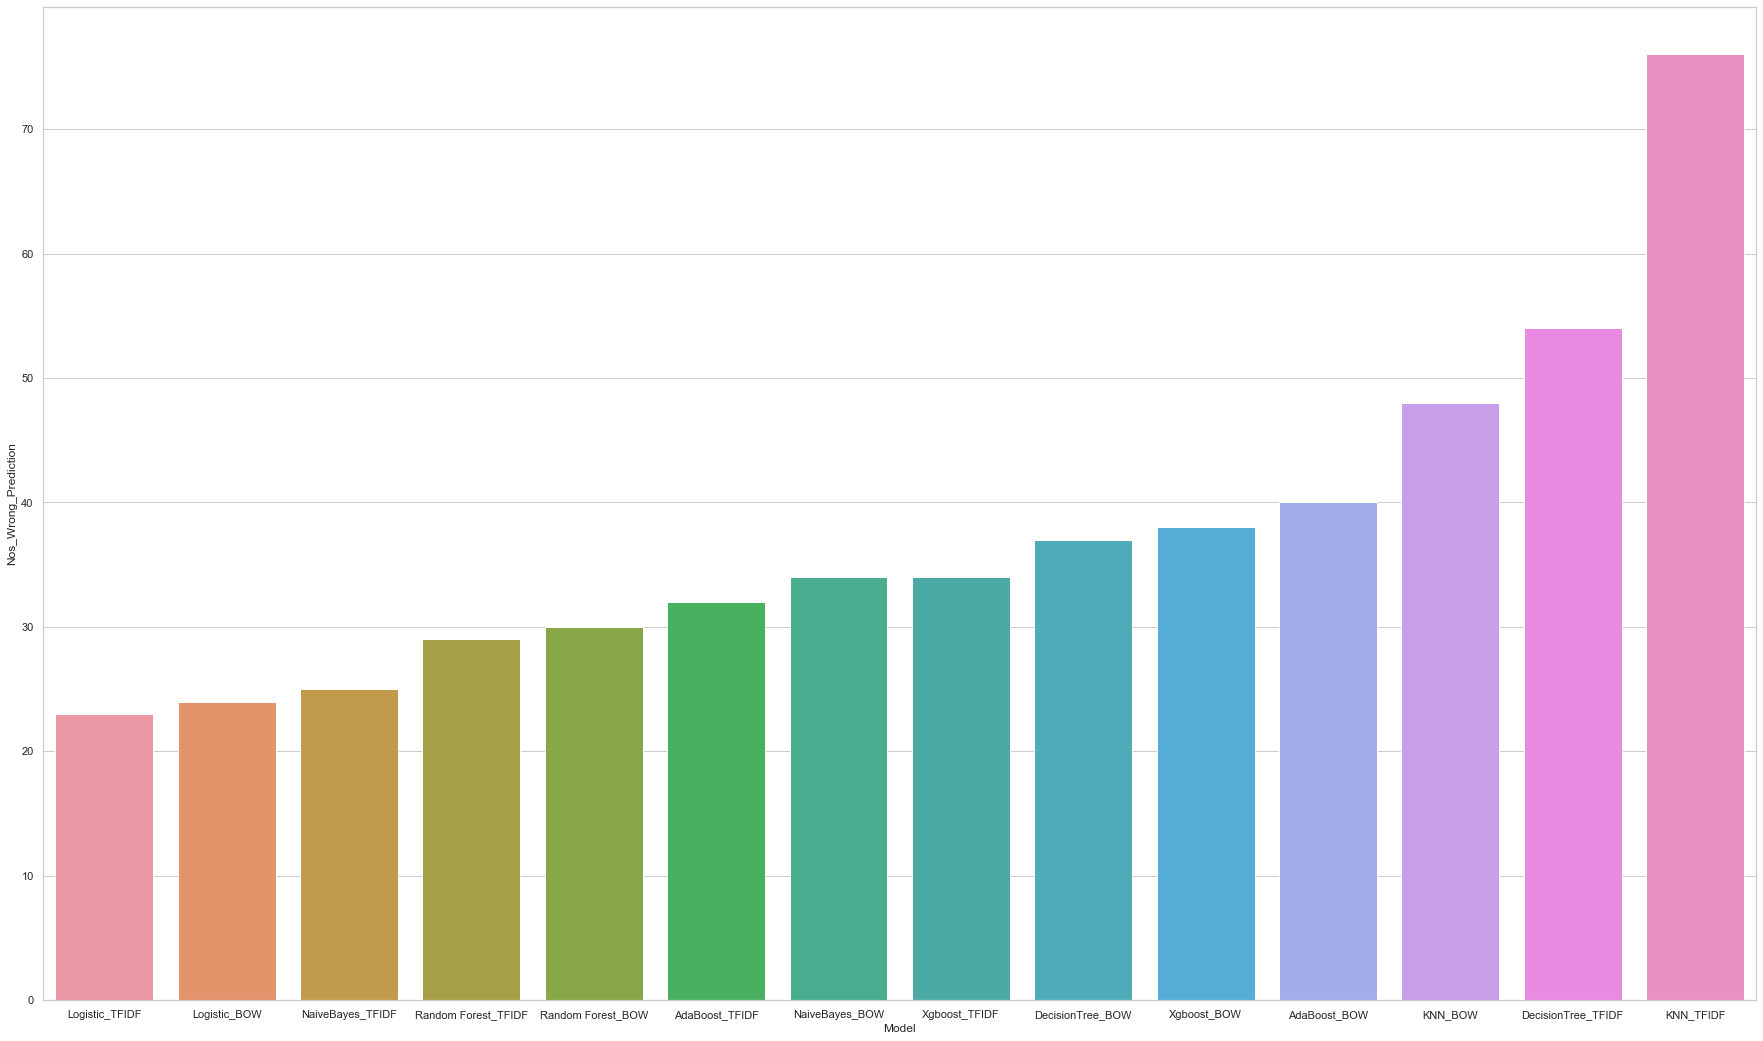

In [230]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30.7,18.27)})
sns.set(style="whitegrid")
ax = sns.barplot(x="Model", y="Nos_Wrong_Prediction", data=result_df)

# Logistic with TFIDF is giving us the best result
# Logistic with Bag of Words Model is givig us the next best result
# Naive Bayes with TFIDF is giving the third best result

# Newer Supervised Deep Learning Models

In [231]:
import gensim
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Activation, Dense, LSTM, Embedding, BatchNormalization
from sklearn.preprocessing import LabelEncoder

## Prediction class label encoding

In [640]:
le = LabelEncoder()
# tokenize train reviews & encode train labels
tokenized_train = [nltk.word_tokenize(text)
                       for text in norm_train_message]
y_train = le.fit_transform(train_y)
# tokenize test reviews & encode test labels
tokenized_test = [nltk.word_tokenize(text)
                       for text in norm_test_message]
y_test = le.fit_transform(test_y)

In [641]:
# print class label encoding map and encoded labels
print('Spam class label map:', dict(zip(le.classes_, le.transform(le.classes_))))
print('Sample test label transformation:\n'+'-'*35,
      '\nActual Labels:', test_y[:3], '\nEncoded Labels:', y_test[:3])

Spam class label map: {0: 0, 1: 1}
Sample test label transformation:
----------------------------------- 
Actual Labels: 4316    0
4808    1
3519    0
Name: label_num, dtype: int64 
Encoded Labels: [0 1 0]


## Feature Engineering with word embeddings

In [642]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [643]:
%%time
# build word2vec model
w2v_num_features = 300
w2v_model = gensim.models.Word2Vec(tokenized_train, size=w2v_num_features, window=150,
                                   min_count=10, workers=4, iter=5)    

2019-09-18 20:12:22,501 : INFO : collecting all words and their counts
2019-09-18 20:12:22,514 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-18 20:12:22,526 : INFO : collected 5074 word types from a corpus of 40633 raw words and 3900 sentences
2019-09-18 20:12:22,529 : INFO : Loading a fresh vocabulary
2019-09-18 20:12:22,536 : INFO : min_count=10 retains 607 unique words (11% of original 5074, drops 4467)
2019-09-18 20:12:22,537 : INFO : min_count=10 leaves 31194 word corpus (76% of original 40633, drops 9439)
2019-09-18 20:12:22,542 : INFO : deleting the raw counts dictionary of 5074 items
2019-09-18 20:12:22,543 : INFO : sample=0.001 downsamples 56 most-common words
2019-09-18 20:12:22,543 : INFO : downsampling leaves estimated 19669 word corpus (63.1% of prior 31194)
2019-09-18 20:12:22,549 : INFO : estimated required memory for 607 words and 300 dimensions: 1760300 bytes
2019-09-18 20:12:22,552 : INFO : resetting layer weights
2019-09-18 20:12:

CPU times: user 471 ms, sys: 69.8 ms, total: 541 ms
Wall time: 337 ms


In [644]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [645]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model,
                                                     num_features=w2v_num_features)
avg_wv_test_features = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model,
                                                    num_features=w2v_num_features)

In [646]:
print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape, ' Test features shape:', avg_wv_test_features.shape)

Word2Vec model:> Train features shape: (3900, 300)  Test features shape: (1672, 300)


## Modeling with deep neural networks 


### Building Deep neural network architecture

In [676]:
def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, input_shape=(num_input_features,)))
    dnn_model.add(Activation('elu'))
    dnn_model.add(BatchNormalization())
    dnn_model.add(Dropout(0.5))
    
    dnn_model.add(Dense(256))
    dnn_model.add(Activation('elu'))
    dnn_model.add(BatchNormalization())
    dnn_model.add(Dropout(0.5))
    
    dnn_model.add(Dense(256))
    dnn_model.add(Activation('elu'))
    dnn_model.add(BatchNormalization())
    dnn_model.add(Dropout(0.5))
    
    dnn_model.add(Dense(1))
    dnn_model.add(Activation('sigmoid'))

    dnn_model.compile(loss='binary_crossentropy', optimizer='adam',                 
                      metrics=['accuracy'])
    return dnn_model

In [677]:
w2v_dnn = construct_deepnn_architecture(num_input_features=w2v_num_features)

In [678]:
w2v_dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               154112    
_________________________________________________________________
activation_27 (Activation)   (None, 512)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_28 (Activation)   (None, 256)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
__________

In [681]:
batch_size = 100
w2v_dnn.fit(avg_wv_train_features, y_train, epochs=50, batch_size=batch_size, 
            shuffle=True, validation_split=0.01, verbose=1)

Train on 3861 samples, validate on 39 samples
Epoch 1/50
3861/3861 [==============================] - 0s 93us/step - loss: 0.1128 - acc: 0.9611 - val_loss: 0.1066 - val_acc: 0.9744
Epoch 2/50
3861/3861 [==============================] - 0s 97us/step - loss: 0.1067 - acc: 0.9656 - val_loss: 0.1053 - val_acc: 0.9744
Epoch 3/50
3861/3861 [==============================] - 0s 93us/step - loss: 0.1058 - acc: 0.9635 - val_loss: 0.0995 - val_acc: 0.9744
Epoch 4/50
3861/3861 [==============================] - 0s 99us/step - loss: 0.1089 - acc: 0.9648 - val_loss: 0.1182 - val_acc: 0.9744
Epoch 5/50
3861/3861 [==============================] - 0s 86us/step - loss: 0.1057 - acc: 0.9653 - val_loss: 0.1016 - val_acc: 0.9744
Epoch 6/50
3861/3861 [==============================] - 0s 94us/step - loss: 0.1140 - acc: 0.9593 - val_loss: 0.0985 - val_acc: 0.9744
Epoch 7/50
3861/3861 [==============================] - 0s 90us/step - loss: 0.1118 - acc: 0.9624 - val_loss: 0.0858 - val_acc: 0.9744
Epoch 8/5

In [682]:
y_pred = w2v_dnn.predict_classes(avg_wv_test_features)
predictions = le.inverse_transform(y_pred) 

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [683]:
labels = ['spam', 'ham']
print(classification_report(test_y, predictions))
pd.DataFrame(confusion_matrix(test_y, predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1459
           1       0.92      0.84      0.88       213

    accuracy                           0.97      1672
   macro avg       0.95      0.92      0.93      1672
weighted avg       0.97      0.97      0.97      1672



,spam,ham
spam,1444,15
ham,34,179


In [716]:
result_data.update({'DNN_Word2vec': wrong_prediction(confusion_matrix(test_y, predictions))})

# LSTM Model
## Build Model Architecture

## Preprocessing

To prepare text data for our deep learning model, we transform each review into a sequence.
Every word in the review is mapped to an integer index and thus the sentence turns into a sequence of numbers.

To perform this transformation, keras provides the ```Tokenizer```

In [684]:
import tensorflow as tf

t = tf.keras.preprocessing.text.Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(norm_train_message)
t.word_index['<PAD>'] = 0

In [685]:
max([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), min([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), t.word_index['<UNK>']

(('<UNK>', 5075), ('<PAD>', 0), 5075)

In [686]:
train_sequences = t.texts_to_sequences(norm_train_message)
test_sequences = t.texts_to_sequences(norm_test_message)

In [687]:
print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))

Vocabulary size=5076
Number of Documents=3900


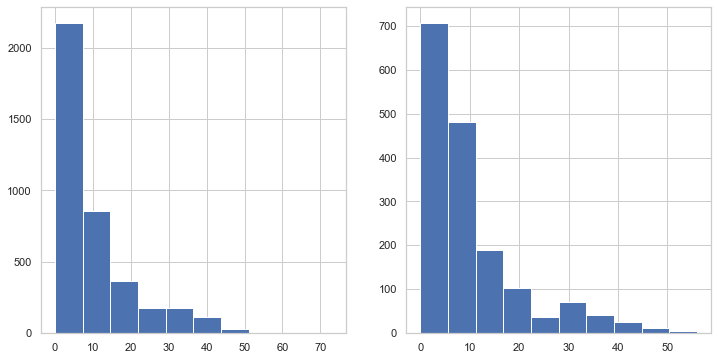

In [688]:
import matplotlib.pyplot as plt
%matplotlib inline

train_lens = [len(s) for s in train_sequences]
test_lens = [len(s) for s in test_sequences]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

### Sequence Normalization

Not all reviews are of same length. To handle this difference in length of reviews, we define a maximum length.
For reviews which are smaller than this length, we pad them with zeros which longer ones are truncated

In [689]:
MAX_SEQUENCE_LENGTH = 1000

In [690]:
# pad dataset to a maximum review length in words
X_train = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train.shape, X_test.shape

((3900, 1000), (1672, 1000))

### Encoding Labels

The dataset contains labels of the form positive/negative. The following step encodes the labels using ```sklearn's``` ```LabelEncoder```

In [691]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0

In [692]:
y_train = le.fit_transform(train_y)
y_test = le.transform(test_y)

In [693]:
VOCAB_SIZE = len(t.word_index)

In [694]:
embed_dim = 30
lstm_out = 128
batch_size = 32

In [695]:
def construct_LSTM_architecture(num_input_features):
    dnn_model = Sequential()
    
    dnn_model.add(Embedding(VOCAB_SIZE, embed_dim,input_length = MAX_SEQUENCE_LENGTH))

    dnn_model.add(LSTM(32, input_shape=(num_input_features,)))
    dnn_model.add(Activation('relu'))
    dnn_model.add(Dropout(0.2))
    
    dnn_model.add(Dense(1))
    dnn_model.add(Activation('sigmoid'))

    dnn_model.compile(loss='binary_crossentropy', optimizer='adam',                 
                      metrics=['accuracy'])
    return dnn_model

In [696]:
w2v_dnn = construct_LSTM_architecture(num_input_features=w2v_num_features)

In [697]:
w2v_dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1000, 30)          152280    
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                8064      
_________________________________________________________________
activation_31 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
_________________________________________________________________
activation_32 (Activation)   (None, 1)                 0         
Total params: 160,377
Trainable params: 160,377
Non-trainable params: 0
_________________________________________________________________


In [713]:
batch_size = 100
w2v_dnn.fit(X_train, y_train, epochs=50, batch_size=batch_size, 
          shuffle=True, validation_split=0.1, verbose=0)

Train on 3510 samples, validate on 390 samples
Epoch 1/1
3510/3510 [==============================] - 41s 12ms/step - loss: 0.0443 - acc: 0.9869 - val_loss: 0.0571 - val_acc: 0.9872


In [714]:
y_pred = w2v_dnn.predict_classes(X_test)
predictions = le.inverse_transform(y_pred) 

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [707]:
labels = ['spam', 'ham']
print(classification_report(test_y, predictions))
pd.DataFrame(confusion_matrix(test_y, predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1459
           1       0.98      0.94      0.96       213

    accuracy                           0.99      1672
   macro avg       0.99      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672



,spam,ham
spam,1455,4
ham,13,200


In [232]:
result_data.update({'LSTM_Word2vec': wrong_prediction(confusion_matrix(test_y, predictions))})

In [233]:
result_data

{'Logistic_BOW': 24,
 'Logistic_TFIDF': 23,
 'NaiveBayes_BOW': 34,
 'NaiveBayes_TFIDF': 25,
 'DecisionTree_BOW': 37,
 'DecisionTree_TFIDF': 54,
 'KNN_BOW': 48,
 'KNN_TFIDF': 76,
 'Random Forest_BOW': 30,
 'Random Forest_TFIDF': 29,
 'AdaBoost_BOW': 40,
 'AdaBoost_TFIDF': 32,
 'Xgboost_BOW': 38,
 'Xgboost_TFIDF': 34,
 'LSTM_Word2vec': 17}

# So far LSTM as given best result

# Pre-Trained Deeplearning Model using tensorflow-hub

In [2]:
import tensorflow as tf
import tensorflow_hub as hub

In [3]:
tf.test.is_gpu_available()

False

In [77]:
%%time

norm_train_message_transfer = np.array(pre_process_corpus(train_X["message_clean"].values))
norm_test_message_transfer = np.array(pre_process_corpus(test_X["message_clean"].values))

100%|██████████| 1672/1672 [00:00<00:00, 8057.75it/s]

CPU times: user 676 ms, sys: 33.3 ms, total: 709 ms
Wall time: 713 ms


In [78]:
train_y.values

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
# Training input on the whole training set with no limit on training epochs.
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {'sentence': norm_train_message_transfer}, np.array(train_y.values), 
    batch_size=256, num_epochs=None, shuffle=True)

In [80]:
# Prediction on the whole training set.
predict_train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {'sentence': norm_train_message_transfer}, np.array(train_y.values), shuffle=False)

In [81]:
# Prediction on the whole validation set.
predict_val_input_fn = tf.estimator.inputs.numpy_input_fn(
    {'sentence': norm_test_message_transfer}, np.array(test_y.values), shuffle=False)

In [82]:
# Prediction on the test set.
predict_test_input_fn = tf.estimator.inputs.numpy_input_fn(
    {'sentence': norm_test_message_transfer}, np.array(test_y.values), shuffle=False)

# universal-sentence-encoder

In [48]:
embedding_feature = hub.text_embedding_column(
    key='sentence', 
    module_spec="https://tfhub.dev/google/universal-sentence-encoder/2",
    trainable=False)

In [83]:
dnn = tf.estimator.DNNClassifier(
          hidden_units=[512, 128],
          feature_columns=[embedding_feature],
          n_classes=2,
          activation_fn=tf.nn.relu,
          dropout=0.1,
          optimizer=tf.train.AdagradOptimizer(learning_rate=0.005))

In [84]:
tf.logging.set_verbosity(tf.logging.ERROR)
import time

TOTAL_STEPS = 1200
STEP_SIZE = 300
for step in range(0, TOTAL_STEPS, STEP_SIZE):
    print()
    print('-'*100)
    print('Training for step:', step, '-', step+STEP_SIZE)
    start_time = time.time()
    dnn.train(input_fn=train_input_fn, steps=STEP_SIZE)
    elapsed_time = time.time() - start_time
    print('Train Time (s):', elapsed_time)
    print('Eval Metrics (Train):', dnn.evaluate(input_fn=predict_train_input_fn))
    print('Eval Metrics (Validation):', dnn.evaluate(input_fn=predict_val_input_fn))


----------------------------------------------------------------------------------------------------
Training for step: 0 - 300
Train Time (s): 64.79281425476074
Eval Metrics (Train): {'accuracy': 0.99333334, 'accuracy_baseline': 0.86230767, 'auc': 0.9981406, 'auc_precision_recall': 0.99470824, 'average_loss': 0.024679067, 'label/mean': 0.1376923, 'loss': 3.1047857, 'precision': 0.97936213, 'prediction/mean': 0.13968052, 'recall': 0.97206706, 'global_step': 300}
Eval Metrics (Validation): {'accuracy': 0.9826555, 'accuracy_baseline': 0.8744019, 'auc': 0.9843642, 'auc_precision_recall': 0.9713104, 'average_loss': 0.06040739, 'label/mean': 0.12559809, 'loss': 7.214368, 'precision': 0.9458128, 'prediction/mean': 0.12530401, 'recall': 0.9142857, 'global_step': 300}

----------------------------------------------------------------------------------------------------
Training for step: 300 - 600


Train Time (s): 58.045026779174805
Eval Metrics (Train): {'accuracy': 0.99641025, 'accuracy_baseline': 0.86230767, 'auc': 0.9998029, 'auc_precision_recall': 0.99889505, 'average_loss': 0.012795246, 'label/mean': 0.1376923, 'loss': 1.6097245, 'precision': 0.988785, 'prediction/mean': 0.13708383, 'recall': 0.9851024, 'global_step': 600}
Eval Metrics (Validation): {'accuracy': 0.9826555, 'accuracy_baseline': 0.8744019, 'auc': 0.9825957, 'auc_precision_recall': 0.97036695, 'average_loss': 0.06628515, 'label/mean': 0.12559809, 'loss': 7.9163404, 'precision': 0.9502488, 'prediction/mean': 0.12128693, 'recall': 0.9095238, 'global_step': 600}

----------------------------------------------------------------------------------------------------
Training for step: 600 - 900


Train Time (s): 59.94782495498657
Eval Metrics (Train): {'accuracy': 0.9982051, 'accuracy_baseline': 0.86230767, 'auc': 0.99998474, 'auc_precision_recall': 0.9999052, 'average_loss': 0.006644411, 'label/mean': 0.1376923, 'loss': 0.8359097, 'precision': 0.9962547, 'prediction/mean': 0.13778745, 'recall': 0.99068904, 'global_step': 900}
Eval Metrics (Validation): {'accuracy': 0.9820574, 'accuracy_baseline': 0.8744019, 'auc': 0.97810084, 'auc_precision_recall': 0.9661275, 'average_loss': 0.07138207, 'label/mean': 0.12559809, 'loss': 8.525059, 'precision': 0.94554454, 'prediction/mean': 0.12194768, 'recall': 0.9095238, 'global_step': 900}

----------------------------------------------------------------------------------------------------
Training for step: 900 - 1200


Train Time (s): 58.35684514045715
Eval Metrics (Train): {'accuracy': 0.9997436, 'accuracy_baseline': 0.86230767, 'auc': 0.99999726, 'auc_precision_recall': 0.9999826, 'average_loss': 0.0037778446, 'label/mean': 0.1376923, 'loss': 0.47527722, 'precision': 0.9981413, 'prediction/mean': 0.13763918, 'recall': 1.0, 'global_step': 1200}
Eval Metrics (Validation): {'accuracy': 0.9820574, 'accuracy_baseline': 0.8744019, 'auc': 0.97613335, 'auc_precision_recall': 0.9660038, 'average_loss': 0.07797057, 'label/mean': 0.12559809, 'loss': 9.3119135, 'precision': 0.94554454, 'prediction/mean': 0.12163948, 'recall': 0.9095238, 'global_step': 1200}


In [85]:
dnn.evaluate(input_fn=predict_train_input_fn)

{'accuracy': 0.9997436,
 'accuracy_baseline': 0.86230767,
 'auc': 0.99999726,
 'auc_precision_recall': 0.9999826,
 'average_loss': 0.0037778446,
 'label/mean': 0.1376923,
 'loss': 0.47527722,
 'precision': 0.9981413,
 'prediction/mean': 0.13763918,
 'recall': 1.0,
 'global_step': 1200}

In [102]:
transfer_predict = list(dnn.predict(input_fn=predict_test_input_fn))

In [91]:
type(a)

list

In [103]:
pred=[]
for i in transfer_predict:
    pred.append(np.argmax(i["probabilities"]))

In [104]:
labels = ['spam', 'ham']
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_y, pred))
pd.DataFrame(confusion_matrix(test_y, pred), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1462
           1       0.95      0.91      0.93       210

    accuracy                           0.98      1672
   macro avg       0.97      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



,spam,ham
spam,1451,11
ham,19,191


In [113]:
import time

TOTAL_STEPS = 1200
STEP_SIZE = 400

my_checkpointing_config = tf.estimator.RunConfig(
    keep_checkpoint_max = 1,       # Retain the 2 most recent checkpoints.
)

def train_and_evaluate_with_sentence_encoder(hub_module, train_module=False, path=''):
    embedding_feature = hub.text_embedding_column(
        key='sentence', module_spec=hub_module, trainable=train_module)
  
    print()
    print('='*100)
    print('Training with', hub_module)
    print('Trainable is:', train_module)
    print('='*100)
  
    dnn = tf.estimator.DNNClassifier(
            hidden_units=[512, 128],
            feature_columns=[embedding_feature],
            n_classes=2,
            activation_fn=tf.nn.relu,
            dropout=0.1,
            optimizer=tf.train.AdagradOptimizer(learning_rate=0.005),
            model_dir=path,
            config=my_checkpointing_config)

    for step in range(0, TOTAL_STEPS, STEP_SIZE):
        print('-'*100)
        print('Training for step:', step, '-', step+STEP_SIZE)
        start_time = time.time()
        dnn.train(input_fn=train_input_fn, steps=STEP_SIZE)
        elapsed_time = time.time() - start_time
        print('Train Time (s):', elapsed_time)
        print('Eval Metrics (Train):', dnn.evaluate(input_fn=predict_train_input_fn))
        print('Eval Metrics (Validation):', dnn.evaluate(input_fn=predict_val_input_fn))

    train_eval_result = dnn.evaluate(input_fn=predict_train_input_fn)
    test_eval_result = dnn.evaluate(input_fn=predict_test_input_fn)
    transfer_predict = list(dnn.predict(input_fn=predict_test_input_fn))
    pred=[]
    for i in transfer_predict:
        pred.append(np.argmax(i["probabilities"]))
        
    labels = ['spam', 'ham']
    print(classification_report(test_y, pred))
    pd.DataFrame(confusion_matrix(test_y, pred), index=labels, columns=labels)
    wrong = wrong_prediction(confusion_matrix(test_y, pred))
    return {
      "Model Dir": dnn.model_dir,
      "Training Accuracy": train_eval_result["accuracy"],
      "Test Accuracy": test_eval_result["accuracy"],
      "Training AUC": train_eval_result["auc"],
      "Test AUC": test_eval_result["auc"],
      "Training Precision": train_eval_result["precision"],
      "Test Precision": test_eval_result["precision"],
      "Training Recall": train_eval_result["recall"],
      "Test Recall": test_eval_result["recall"],
      "Wrong Prediction" : wrong
    }

# Train Deep Learning Models on difference Sentence Encoders


# Note : Below code was ran in Tensorflow 2.0 Version
# used google colaboratory platform to run using GPU 

# TF Hub for TF2: Spam Detection

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/gist/nursnaaz/39275b71e807fa3ab252f7e173507610/transfer-learning-spam-classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/nursnaaz/Deeplearning-and-NLP/blob/master/06%2520-%2520NLP%2520Applications/06%2520-%2520Text%2520Classification/Transfer_Learning_Spam_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [0]:
!pip uninstall -y tf-nightly tensorflow
!pip install tf-nightly-2.0-preview --quiet
!pip install "tensorflow-hub>=0.3"

In [0]:
from __future__ import absolute_import, division, print_function

import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

## Build the model

The neural network is created by stacking layers—this requires three main architectural decisions:

* How to represent the text?
* How many layers to use in the model?
* How many *hidden units* to use for each layer?

In this example, the input data consists of sentences. The labels to predict are either 0 or 1.

One way to represent the text is to convert sentences into embeddings vectors. We can use a pre-trained text embedding as the first layer, which will have two advantages:
*   we don't have to worry anout text preprocessing,
*   we can benefit from transfer learning.

For this example we will use a model from [TensorFlow Hub](https://www.tensorflow.org/hub) called [google/tf2-preview/gnews-swivel-20dim/1](https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1).

There are three other models to test for the sake of this tutorial:
* [google/tf2-preview/gnews-swivel-20dim-with-oov/1](https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1) - same as [google/tf2-preview/gnews-swivel-20dim/1](https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1), but with 2.5% vocabulary converted to OOV buckets. This can help if vocabulary of the task and vocabulary of the model don't fully overlap.
* [google/tf2-preview/nnlm-en-dim50/1](https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1) - A much larger model with ~1M vocabulary size and 50 dimensions.
* [google/tf2-preview/nnlm-en-dim128/1](https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1) - Even larger model with ~1M vocabulary size and 128 dimensions.

Let's first create a Keras layer that uses a TensorFlow Hub model to embed the sentences, and try it out on a couple of input examples. Note that the output shape of the produced embeddings is a expected: `(num_examples, embedding_dimension)`.

In [0]:
model = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"
hub_layer = hub.KerasLayer(model, output_shape=[128], input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_X[:3])

Let's now build the full model:

In [0]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

The layers are stacked sequentially to build the classifier:

1. The first layer is a TensorFlow Hub layer. This layer uses a pre-trained Saved Model to map a sentence into its embedding vector. The model that we are using ([google/tf2-preview/gnews-swivel-20dim/1](https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1)) splits the sentence into tokens, embeds each token and then combines the embedding. The resulting dimensions are: `(num_examples, embedding_dimension)`.
2. This fixed-length output vector is piped through a fully-connected (`Dense`) layer with 16 hidden units.
3. The last layer is densely connected with a single output node. Using the `sigmoid` activation function, this value is a float between 0 and 1, representing a probability, or confidence level.

### Hidden units

The above model has two intermediate or "hidden" layers, between the input and output. The number of outputs (units, nodes, or neurons) is the dimension of the representational space for the layer. In other words, the amount of freedom the network is allowed when learning an internal representation.

If a model has more hidden units (a higher-dimensional representation space), and/or more layers, then the network can learn more complex representations. However, it makes the network more computationally expensive and may lead to learning unwanted patterns—patterns that improve performance on training data but not on the test data. This is called *overfitting*, and we'll explore it later.

### Loss function and optimizer

A model needs a loss function and an optimizer for training. Since this is a binary classification problem and the model outputs a probability (a single-unit layer with a sigmoid activation), we'll use the `binary_crossentropy` loss function. 

This isn't the only choice for a loss function, you could, for instance, choose `mean_squared_error`. But, generally, `binary_crossentropy` is better for dealing with probabilities—it measures the "distance" between probability distributions, or in our case, between the ground-truth distribution and the predictions.

Later, when we are exploring regression problems (say, to predict the price of a house), we will see how to use another loss function called mean squared error.

Now, configure the model to use an optimizer and a loss function:

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Train the model

Train the model for 40 epochs in mini-batches of 512 samples. This is 40 iterations over all samples in the `x_train` and `y_train` tensors. While training, monitor the model's loss and accuracy on the 10,000 samples from the validation set:

In [0]:
history = model.fit(np.array(train_X),
                    np.array(train_y),
                    epochs=40,
                    batch_size=512,
                    validation_data=(test_X, test_y),
                    verbose=1)

## Evaluate the model

And let's see how the model performs. Two values will be returned. Loss (a number which represents our error, lower values are better), and accuracy.

In [0]:
results = model.evaluate(test_X, test_y)

print(results)

In [0]:
results = model.predict(test_X)


In [0]:
pred = np.where(results>0.499,1,0)

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,pred)

This fairly naive approach achieves an accuracy of about 87%. With more advanced approaches, the model should get closer to 95%.

## Create a graph of accuracy and loss over time

`model.fit()` returns a `History` object that contains a dictionary with everything that happened during training:

In [0]:
history_dict = history.history
history_dict.keys()

There are four entries: one for each monitored metric during training and validation. We can use these to plot the training and validation loss for comparison, as well as the training and validation accuracy:

In [0]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In this plot, the dots represent the training loss and accuracy, and the solid lines are the validation loss and accuracy.

Notice the training loss *decreases* with each epoch and the training accuracy *increases* with each epoch. This is expected when using a gradient descent optimization—it should minimize the desired quantity on every iteration.

This isn't the case for the validation loss and accuracy—they seem to peak after about twenty epochs. This is an example of overfitting: the model performs better on the training data than it does on data it has never seen before. After this point, the model over-optimizes and learns representations *specific* to the training data that do not *generalize* to test data.

For this particular case, we could prevent overfitting by simply stopping the training after twenty or so epochs. Later, you'll see how to do this automatically with a callback.

In [0]:
# Training input on the whole training set with no limit on training epochs.
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    {'sentence': train_X}, train_y, 
    batch_size=256, num_epochs=None, shuffle=True)

# Prediction on the whole training set.
predict_train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    {'sentence': train_X}, train_y, shuffle=False)

# Prediction on the whole validation set.
predict_val_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    {'sentence': test_X}, test_y, shuffle=False)

# Prediction on the test set.
predict_test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    {'sentence': test_X}, test_y, shuffle=False)

In [0]:
result_data = dict()

def wrong_prediction(conf):
    return conf[0][1] + conf[1][0]


In [0]:
import time

TOTAL_STEPS = 1200
STEP_SIZE = 1200

my_checkpointing_config = tf.estimator.RunConfig(
    keep_checkpoint_max = 1,       # Retain the 2 most recent checkpoints.
)

def train_and_evaluate_with_sentence_encoder(hub_module, train_module=False, path=''):
    embedding_feature = hub.text_embedding_column(
        key='sentence', module_spec=hub_module, trainable=train_module)
  
    print()
    print('='*100)
    print('Training with', hub_module)
    print('Trainable is:', train_module)
    print('='*100)
  
    dnn = tf.estimator.DNNClassifier(
            hidden_units=[512, 128],
            feature_columns=[embedding_feature],
            n_classes=2,
            activation_fn=tf.nn.relu,
            dropout=0.1,
            optimizer=tf.optimizers.Adam(learning_rate=0.005),
            model_dir=path,
            config=my_checkpointing_config)

    for step in range(0, TOTAL_STEPS, STEP_SIZE):
        print('-'*100)
        print('Training for step:', step, '-', step+STEP_SIZE)
        start_time = time.time()
        dnn.train(input_fn=train_input_fn, steps=STEP_SIZE)
        elapsed_time = time.time() - start_time
        print('Train Time (s):', elapsed_time)
        print('Eval Metrics (Train):', dnn.evaluate(input_fn=predict_train_input_fn))
        print('Eval Metrics (Validation):', dnn.evaluate(input_fn=predict_val_input_fn))

    train_eval_result = dnn.evaluate(input_fn=predict_train_input_fn)
    test_eval_result = dnn.evaluate(input_fn=predict_test_input_fn)
    transfer_predict = list(dnn.predict(input_fn=predict_test_input_fn))
    pred=[]
    for i in transfer_predict:
        pred.append(np.argmax(i["probabilities"]))
        
    labels = ['spam', 'ham']
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(test_y, pred))
    pd.DataFrame(confusion_matrix(test_y, pred), index=labels, columns=labels)
    wrong = wrong_prediction(confusion_matrix(test_y, pred))
    return {
      "Model Dir": dnn.model_dir,
      "Training Accuracy": train_eval_result["accuracy"],
      "Test Accuracy": test_eval_result["accuracy"],
      "Training AUC": train_eval_result["auc"],
      "Test AUC": test_eval_result["auc"],
      "Training Precision": train_eval_result["precision"],
      "Test Precision": test_eval_result["precision"],
      "Training Recall": train_eval_result["recall"],
      "Test Recall": test_eval_result["recall"],
      "Wrong Prediction" : wrong
    }

In [0]:

results = {}

results["nnlm-en-dim128"] = train_and_evaluate_with_sentence_encoder(
    "https://tfhub.dev/google/nnlm-en-dim128/1", path='/storage/models/nnlm-en-dim128_fr/')



In [0]:
results["nnlm-en-dim128-with-training"] = train_and_evaluate_with_sentence_encoder(
    "https://tfhub.dev/google/nnlm-en-dim128/1", train_module=True, path='/storage/models/nnlm-en-dim128_ft/')

results["use-512"] = train_and_evaluate_with_sentence_encoder(
    "https://tfhub.dev/google/universal-sentence-encoder/2", path='/storage/models/use-512_fr/')

results["use-512-with-training"] = train_and_evaluate_with_sentence_encoder(
    "https://tfhub.dev/google/universal-sentence-encoder/2", train_module=True, path='/storage/models/use-512_ft/')

In [0]:
results_df = pd.DataFrame.from_dict(results, orient="index")
results_df

In [4]:
results_df = pd.read_csv("transfer_result.csv")
results_df

,Model Dir,Training Accuracy,Test Accuracy,Training AUC,Test AUC,Training Precision,Test Precision,Training Recall,Test Recall,Wrong Prediction
0,/storage/models/nnlm-en-dim128_fr/,1.0,0.987440,1.0,0.983148,1.0,0.947137,1.0,0.959821,21
1,/storage/models/nnlm-en-dim128_ft/,1.0,0.984450,1.0,0.977537,1.0,0.938053,1.0,0.946429,26
2,/storage/models/use-512_fr/,1.0,0.987440,1.0,0.978012,1.0,0.963470,1.0,0.941964,21
3,/storage/models/use-512_ft/,1.0,0.983254,1.0,0.976416,1.0,0.945455,1.0,0.928571,28


# Easily the Transerlearning gave a very good result

# MODEL DEPLOYEMENT

## Pickle the TFIDF and Logistic Regression with TFIDF Model

In [243]:
from sklearn.externals import joblib
joblib.dump(tv, 'tfidf.pkl') 
joblib.dump(lr, 'Logistic_spam_model.pkl')

['Logistic_spam_model.pkl']

In [244]:
tf_new = joblib.load("tfidf.pkl")

In [245]:
type(tf_new)

sklearn.feature_extraction.text.TfidfVectorizer

In [246]:
model = joblib.load("Logistic_spam_model.pkl")

In [281]:
a= ["Free entry in $2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [274]:
tf_new.transform(a)

<1x1570 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [291]:
model.predict(tf_new.transform([data_preprocess_deploy(str(a))]))

array([1])

In [293]:
data_preprocess_deploy(str(a))

'free entri currenc number wkli comp win cup final tkt number number may number number number number text number number number number number receiv entri question std txt rate appli number number number number number number number number number number number number number'

In [292]:
import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata
def data_preprocess_deploy(text):
    
    x = ''.join(" number " if c.isdigit() else c for c in text)
    x = x.replace('$' ,' currency ')
    x = x.replace('£' ,' currency ')
    x = x.replace('€' ,' currency ')
    x = x.replace('₹' ,' currency ')
    text = x.replace('¥' ,' currency ')
    
    text2 = " ".join("".join([" " if ch in string.punctuation else ch for ch in text]).split())

    tokens = [word for sent in nltk.sent_tokenize(text2) for word in
              nltk.word_tokenize(sent)]
    
    tokens = [word.lower() for word in tokens]
    
    stopwds = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopwds]
    
    tokens = [word for word in tokens if len(word)>=3]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    tagged_corpus = pos_tag(tokens)    
    
    Noun_tags = ['NN','NNP','NNPS','NNS']
    Verb_tags = ['VB','VBD','VBG','VBN','VBP','VBZ']

    lemmatizer = WordNetLemmatizer()
    
    def prat_lemmatize(token,tag):
        if tag in Noun_tags:
            return lemmatizer.lemmatize(token,'n')
        elif tag in Verb_tags:
            return lemmatizer.lemmatize(token,'v')
        else:
            return lemmatizer.lemmatize(token,'n')
    
    pre_proc_text =  " ".join([prat_lemmatize(token,tag) for token,tag in tagged_corpus])             


    def strip_html_tags(text):
          soup = BeautifulSoup(text, "html.parser")
          [s.extract() for s in soup(['iframe', 'script'])]
          stripped_text = soup.get_text()
          stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
          return stripped_text

    def remove_accented_chars(text):
          text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          return text
    
    doc = strip_html_tags(pre_proc_text)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  
    return doc

# Built a Flask Application for the Model Prediction in realtime

## app.py

In [ ]:
from flask import Flask,render_template,url_for,request
import pandas as pd 
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
from nltk import pos_tag
from nltk.stem import PorterStemmer


app = Flask(__name__)

@app.route('/')
def home():
	return render_template('home.html')

@app.route('/predict',methods=['POST'])
def predict():
    if request.method == 'POST':
        message = request.form['message']
        print(message)
        my_prediction = model.predict(tf_new.transform([data_preprocess_deploy(str(message))]))
    return render_template('result.html',prediction = my_prediction)

def data_preprocess_deploy(text):
    
    x = ''.join(" number " if c.isdigit() else c for c in text)
    x = x.replace('$' ,' currency ')
    x = x.replace('£' ,' currency ')
    x = x.replace('€' ,' currency ')
    x = x.replace('₹' ,' currency ')
    text = x.replace('¥' ,' currency ')
    
    text2 = " ".join("".join([" " if ch in string.punctuation else ch for ch in text]).split())

    tokens = [word for sent in nltk.sent_tokenize(text2) for word in
              nltk.word_tokenize(sent)]
    
    tokens = [word.lower() for word in tokens]
    
    stopwds = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopwds]
    
    tokens = [word for word in tokens if len(word)>=3]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    tagged_corpus = pos_tag(tokens)    
    
    Noun_tags = ['NN','NNP','NNPS','NNS']
    Verb_tags = ['VB','VBD','VBG','VBN','VBP','VBZ']

    lemmatizer = WordNetLemmatizer()
    
    def prat_lemmatize(token,tag):
        if tag in Noun_tags:
            return lemmatizer.lemmatize(token,'n')
        elif tag in Verb_tags:
            return lemmatizer.lemmatize(token,'v')
        else:
            return lemmatizer.lemmatize(token,'n')
    
    pre_proc_text =  " ".join([prat_lemmatize(token,tag) for token,tag in tagged_corpus])             


    def strip_html_tags(text):
          soup = BeautifulSoup(text, "html.parser")
          [s.extract() for s in soup(['iframe', 'script'])]
          stripped_text = soup.get_text()
          stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
          return stripped_text

    def remove_accented_chars(text):
          text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          return text
    
    doc = strip_html_tags(pre_proc_text)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  
    return doc

if __name__ == '__main__':
    tf_new = joblib.load("tfidf.pkl")
    model = joblib.load("Logistic_spam_model.pkl")
    app.run(debug=True)

## home.html

## result.html

## Output

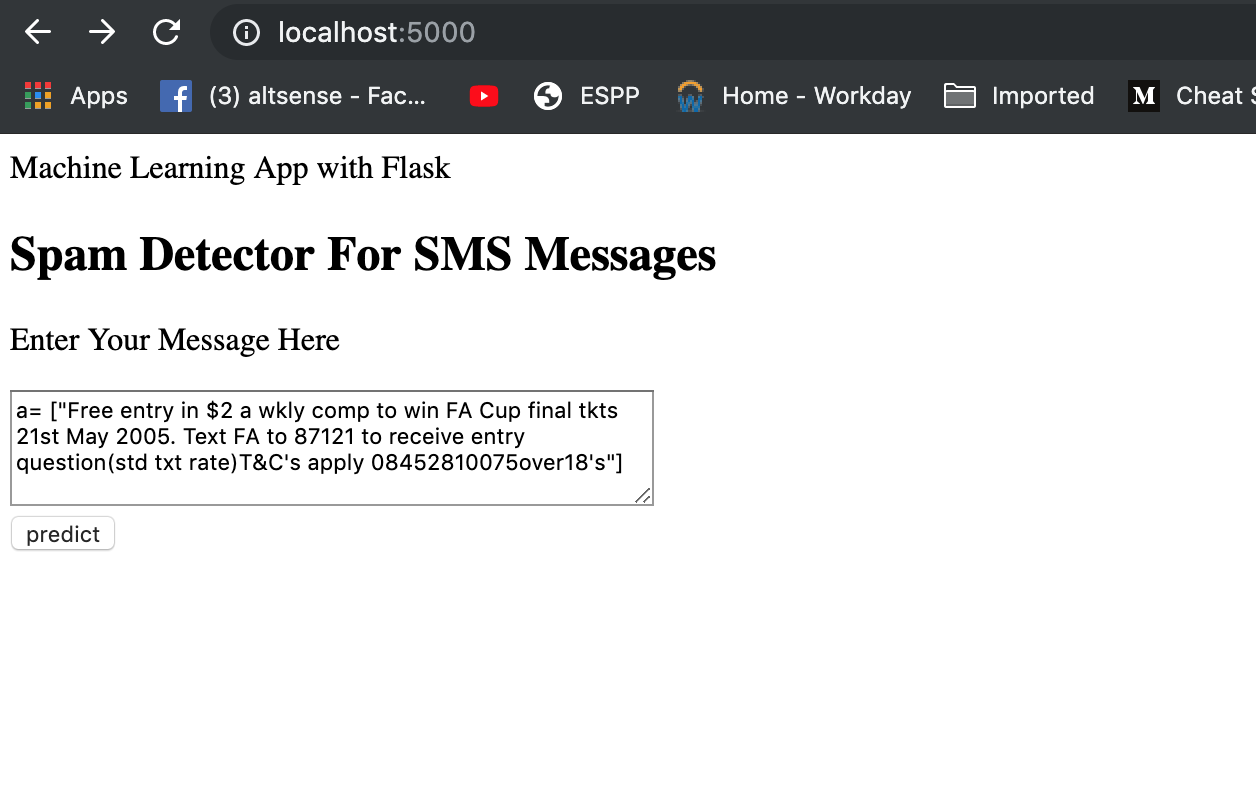

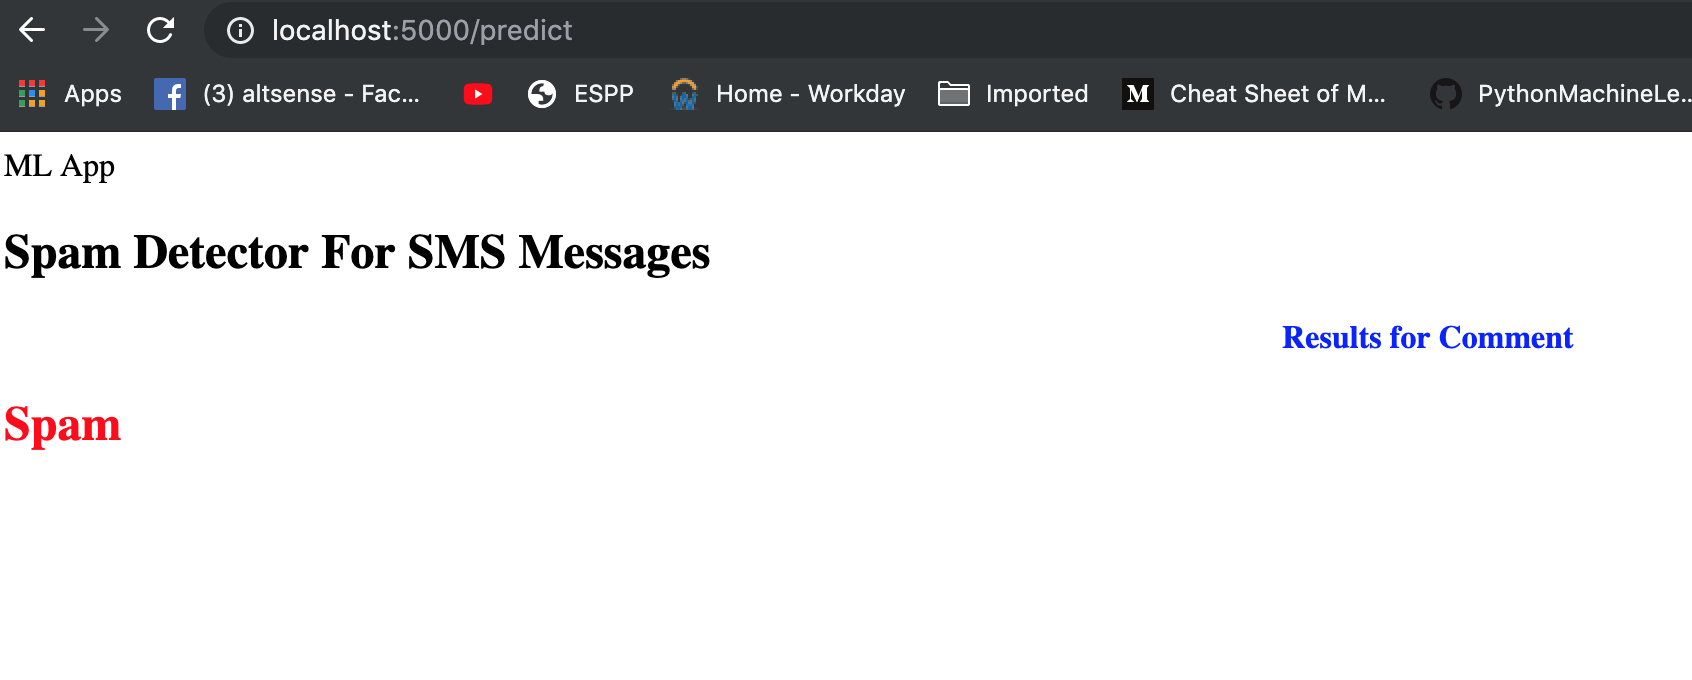